___
<h1> Machine Learning </h1>
<h2> Systems Engineering and Computer Technologies / Engenharia de Sistemas e Tecnologias Informáticas
(LESTI)</h2>
<h3> Instituto Superior de Engenharia / Universidade do Algarve </h3>

[LESTI](https://ise.ualg.pt/curso/1941) / [ISE](https://ise.ualg.pt) / [UAlg](https://www.ualg.pt)

Pedro J. S. Cardoso (pcardoso@ualg.pt)

___

# Neural Networks in Sklearn

Several libraries implement Artificial Neural Networks. For example, you can find its implementation in 
- SKLearn (https://scikit-learn.org/stable/modules/neural_networks_supervised.html)
- Keras (https://keras.io/)
- Tensorflow (https://www.tensorflow.org/)
- PyTorch (https://pytorch.org/)
- ...

Some of these can take advantage of the GPU to speed up the training process. That is the case of Tensorflow and PyTorch. But for now, we'll use the SKLearn implementation, which is simpler and enough for our purposes.

## Iris dataset

Again, we'll use the Iris dataset. So, import necessary libraries, load, and split data:

In [17]:
from sklearn.datasets import load_iris, load_digits
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

import numpy as np

In [18]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=1)

Prepare a multi-layer perceptron classifier (MLPClassifier). By default it has a single hidden layer with 100 neurons, and uses the ReLU activation function. For more details, see the [documentation]

(https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

In [19]:
clf = MLPClassifier(
    verbose=True,  # uncomment to see loss function evolution
    random_state=1
)

Train the classifier and evaluate its performance

In [20]:
clf.fit(X_train, y_train)

Iteration 1, loss = 1.71069437
Iteration 2, loss = 1.63629807
Iteration 3, loss = 1.56591723
Iteration 4, loss = 1.49981392
Iteration 5, loss = 1.43858696
Iteration 6, loss = 1.38270218
Iteration 7, loss = 1.33281817
Iteration 8, loss = 1.28931136
Iteration 9, loss = 1.25225124
Iteration 10, loss = 1.22155085
Iteration 11, loss = 1.19690082
Iteration 12, loss = 1.17768198
Iteration 13, loss = 1.16289459
Iteration 14, loss = 1.15122028
Iteration 15, loss = 1.14139153
Iteration 16, loss = 1.13221099
Iteration 17, loss = 1.12273157
Iteration 18, loss = 1.11224969
Iteration 19, loss = 1.10051110
Iteration 20, loss = 1.08736187
Iteration 21, loss = 1.07294462
Iteration 22, loss = 1.05751557
Iteration 23, loss = 1.04149252
Iteration 24, loss = 1.02524020
Iteration 25, loss = 1.00908097
Iteration 26, loss = 0.99331206
Iteration 27, loss = 0.97815806
Iteration 28, loss = 0.96379018
Iteration 29, loss = 0.95036093
Iteration 30, loss = 0.93779812
Iteration 31, loss = 0.92603472
Iteration 32, los

/Users/pcardoso/anaconda3/envs/AprendizagemAutomatica/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=1, verbose=True)

In [21]:

clf.score(X_test, y_test)

0.8947368421052632

ok...!? let us see if we can improve this... The used parameters were:

In [22]:
clf.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 1,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': True,
 'warm_start': False}

What if the maximum number of iterations (epochs) is increased?

In [23]:
clf = MLPClassifier(
    max_iter=1000,
    random_state=1
    # verbose=True  # uncomment to see loss function evolution
).fit(X_train, y_train)

clf.score(X_test, y_test)

1.0

That is good! Maybe there were other alternatives, like using more layers...?

In [24]:
clf = MLPClassifier(
    hidden_layer_sizes=(100, 100),
    random_state=1,
    #max_iter=1000,
    verbose=True
).fit(X_train, y_train)

clf.score(X_test, y_test)

Iteration 1, loss = 1.12577806
Iteration 2, loss = 1.08462926
Iteration 3, loss = 1.04647274
Iteration 4, loss = 1.00944437
Iteration 5, loss = 0.97321567
Iteration 6, loss = 0.93827986
Iteration 7, loss = 0.90545869
Iteration 8, loss = 0.87709269
Iteration 9, loss = 0.85247616
Iteration 10, loss = 0.82934909
Iteration 11, loss = 0.80730649
Iteration 12, loss = 0.78614771
Iteration 13, loss = 0.76503677
Iteration 14, loss = 0.74442324
Iteration 15, loss = 0.72491816
Iteration 16, loss = 0.70637435
Iteration 17, loss = 0.68857067
Iteration 18, loss = 0.67101687
Iteration 19, loss = 0.65373462
Iteration 20, loss = 0.63677055
Iteration 21, loss = 0.62018511
Iteration 22, loss = 0.60405072
Iteration 23, loss = 0.58845549
Iteration 24, loss = 0.57359984
Iteration 25, loss = 0.55933994
Iteration 26, loss = 0.54554743
Iteration 27, loss = 0.53225229
Iteration 28, loss = 0.51942032
Iteration 29, loss = 0.50706917
Iteration 30, loss = 0.49520369
Iteration 31, loss = 0.48373069
Iteration 32, los

/Users/pcardoso/anaconda3/envs/AprendizagemAutomatica/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


1.0

The probabilities associated to each test instance are 

In [29]:
clf.predict_proba(X_test)

array([[1.00e+00, 8.97e-05, 2.77e-10],
       [3.39e-02, 9.65e-01, 9.75e-04],
       [4.93e-04, 9.99e-01, 9.69e-04],
       [1.00e+00, 1.72e-04, 1.50e-09],
       [1.14e-05, 1.69e-01, 8.31e-01],
       [8.66e-04, 9.73e-01, 2.63e-02],
       [2.60e-05, 6.93e-02, 9.31e-01],
       [9.99e-01, 9.07e-04, 1.32e-08],
       [9.98e-01, 1.95e-03, 4.39e-08],
       [7.31e-07, 2.83e-03, 9.97e-01],
       [1.15e-03, 9.78e-01, 2.11e-02],
       [1.00e+00, 3.84e-04, 3.23e-09],
       [5.23e-07, 4.50e-03, 9.95e-01],
       [7.77e-04, 9.96e-01, 3.64e-03],
       [7.78e-04, 9.44e-01, 5.56e-02],
       [9.99e-01, 1.06e-03, 4.25e-08],
       [9.07e-04, 9.97e-01, 1.95e-03],
       [1.31e-03, 8.33e-01, 1.66e-01],
       [9.99e-01, 9.65e-04, 9.23e-09],
       [9.99e-01, 7.61e-04, 1.08e-08],
       [8.30e-04, 9.28e-01, 7.07e-02],
       [1.40e-03, 6.91e-01, 3.08e-01],
       [2.29e-04, 8.02e-01, 1.98e-01],
       [1.00e+00, 4.71e-04, 7.41e-09],
       [5.99e-06, 6.51e-02, 9.35e-01],
       [1.30e-03, 9.94e-0

The histogram of these probabilities is the following, where we can see that the classifier is very confident about its predictions

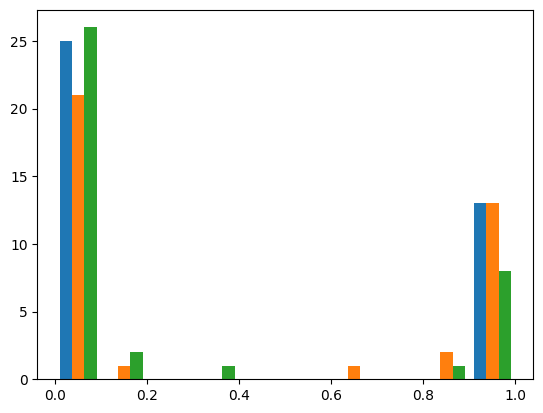

In [31]:
_ = plt.hist(clf.predict_proba(X_test))

## Digits dataset

Let us do a similar analysis using the digits dataset

In [12]:
digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=1)

With default parameters the results are the following

In [13]:
clf = MLPClassifier(random_state=1).fit(X_train, y_train)

clf.score(X_test, y_test)

0.9755555555555555

Not bad! Can it be improved?

In [14]:
clf = MLPClassifier(
    max_iter=1000,
    hidden_layer_sizes=(100, 100),
    random_state=1
).fit(X_train, y_train)

clf.score(X_test, y_test)

0.9866666666666667

It was not worst but there isn't much space to improve. Another try...?

In [15]:
clf = MLPClassifier(
    max_iter=1000,
    tol=1e-10,
    hidden_layer_sizes=(1000),
    random_state=1
).fit(X_train, y_train)

clf.score(X_test, y_test)

/Users/pcardoso/anaconda3/envs/AprendizagemAutomatica/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


0.9844444444444445

And again...!? Since it did not converge, let us increase the maximum iterations number

In [16]:
clf = MLPClassifier(
    max_iter=10000,
    tol=1e-10,
    hidden_layer_sizes=(1000,),
    random_state=1,
    activation='tanh',
).fit(X_train, y_train)

clf.score(X_test, y_test)

0.9911111111111112